In [2354]:
# Importing libraries required for data cleaning and manipulation

In [2355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re

In [2356]:
# Reading Data from the files

In [2357]:
test = pd.read_csv("test.csv", index_col = 0)
train = pd.read_csv("train.csv", index_col = 0)
total = pd.merge(train,test)

In [2358]:
# This is a sample output as required by the kaggle

In [2359]:
gender = pd.read_csv("gender_submission.csv")
# type(test)

In [2360]:
# Calculating average of the age from both train and test dataframesa, as some values of age are not given to us, we are going to replace NaN values with the averages. Taking average because age is continuous data

In [2361]:
avg = train['Age'].mean()
avg2 = test['Age'].mean()

In [2362]:
train['Age'] = train['Age'].fillna(avg)
test['Age'] = test['Age'].fillna(avg2)

In [2363]:
# Replacing NaN in Cabin column with 0 for the time being

In [2364]:
train['Cabin']=train['Cabin'].fillna("!")
test['Cabin']=test['Cabin'].fillna("!")
# train

In [2365]:
# Replacing NaN in Embarked with the value which occurs maximum time(that is taking mode). Using mode because Embarked contains categorical values(S, C or Q).

In [2366]:
train.Embarked.mode()
test.Embarked.mode()
train.Embarked = train['Embarked'].fillna('S')
test.Embarked = test['Embarked'].fillna('S')

In [2367]:
# Checking if Embarked still contains null values

In [2368]:
train.Embarked.isnull().sum()
test.Embarked.isnull().sum()

0

In [2369]:
# This method can be used to see the distribution of age vs Survived or any other to check the importance
# Doing thsi for Age and Fare
#  This method is useful and effective logically as the coefficient will not be increased/decreased by the outliers

In [2370]:
train['AgeBand'] = pd.qcut(train['Age'],4)
train[['AgeBand','Survived']].groupby('AgeBand').mean()

,Survived
AgeBand,
"(0.419, 22.0]",0.424242
"(22.0, 29.699]",0.333333
"(29.699, 35.0]",0.451327
"(35.0, 80.0]",0.382488


In [2371]:
train.loc[train['Age']<=22.0,'Age'] = 0
train.loc[(train['Age']>22.0) & (train['Age']<=29.699),'Age'] = 1
train.loc[(train['Age']>29.699) & (train['Age']<=35),'Age'] = 2
train.loc[(train['Age']>35),'Age'] = 3

test.loc[test['Age']<=22.0,'Age'] = 0
test.loc[(test['Age']>22.0) & (test['Age']<=29.699),'Age'] = 1
test.loc[(test['Age']>29.699) & (test['Age']<=35),'Age'] = 2
test.loc[(test['Age']>35),'Age'] = 3

In [2372]:
train['FareBand'] = pd.qcut(train['Fare'],4)
train[['FareBand','Survived']].groupby('FareBand').mean()

,Survived
FareBand,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [2373]:
train.loc[train['Fare']<=7.91,'Fare'] = 0
train.loc[(train['Fare']>7.91) & (train['Fare']<=14.454),'Fare'] = 1
train.loc[(train['Fare']>14.454) & (train['Fare']<=31.0),'Fare'] = 2
train.loc[(train['Fare']>31.0),'Fare'] = 3

test.loc[test['Fare']<=7.91,'Fare'] = 0
test.loc[(test['Fare']>7.91) & (test['Fare']<=14.454),'Fare'] = 1
test.loc[(test['Fare']>14.454) & (test['Fare']<=31.0),'Fare'] = 2
test.loc[(test['Fare']>31.0),'Fare'] = 3

In [2374]:
# In the next, I used re to find specific pattern in Name, and by pattern I mean finding the designations like "Mr., Mrs., Sir, Ms., Col., etc". I did the same for train and test both Datasets.

In [2375]:
pattern = r'[A-Z]+\.'
regex = re.compile(pattern, flags = re.IGNORECASE)
for i in range(1,len(train.Name)+1):
    train.Name[i] = regex.findall(train.Name[i])[0]


In [2376]:
for i in range(1,len(test.Name)+1):
    test.Name[i+891] = regex.findall(test.Name[i+891])[0]

In [2377]:
# Here an assumption was made that by "Dona." the dataset meant "Don." as all other Designations were same in train and test.

In [2378]:
#  In the next few lines we are explicitly replacing the values by comparing their mean of Survived column, higher mean higher value, just trying it in place of using dummy variables, but you can check that there isn't any significant change in performance, though grouping og age and fare will surely be helpful

In [2379]:
test.Name = test.Name.replace(to_replace = "Dona.", value = "Don.")
test.Name.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Ms.', 'Col.', 'Rev.', 'Dr.',
       'Don.'], dtype=object)

In [2380]:
train.Name.unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [2381]:
train.loc[train.Name == 'Don.','Survived'].mean()

0.0

In [2382]:
train.loc[train.Name == 'Mr.','Name'] = 5
train.loc[train.Name == 'Mrs.','Name'] = 10
train.loc[train.Name == 'Miss.','Name'] = 11
train.loc[train.Name == 'Master.','Name'] = 9
train.loc[train.Name == 'Ms.','Name'] = 16
train.loc[train.Name == 'Col.','Name'] = 8
train.loc[train.Name == 'Rev.','Name'] = 2
train.loc[train.Name == 'Dr.','Name'] = 7
train.loc[train.Name == 'Lady.','Name'] = 1
train.loc[train.Name == 'Sir.','Name'] = 12
train.loc[train.Name == 'Mlle.','Name'] = 14
train.loc[train.Name == 'Capt.','Name'] = 4
train.loc[train.Name == 'Countess.','Name'] = 13
train.loc[train.Name == 'Jonkheer.','Name'] = 3
train.loc[train.Name == 'Mme.','Name'] = 15
train.loc[train.Name == 'Major.','Name'] = 8
train.loc[train.Name == 'Don.','Name'] = 0

test.loc[test.Name == 'Mr.','Name'] = 5
test.loc[test.Name == 'Mrs.','Name'] = 10
test.loc[test.Name == 'Miss.','Name'] = 11
test.loc[test.Name == 'Master.','Name'] = 9
test.loc[test.Name == 'Ms.','Name'] = 16
test.loc[test.Name == 'Col.','Name'] = 8
test.loc[test.Name == 'Rev.','Name'] = 2
test.loc[test.Name == 'Dr.','Name'] = 7
test.loc[test.Name == 'Lady.','Name'] = 1
test.loc[test.Name == 'Sir.','Name'] = 12
test.loc[test.Name == 'Mlle.','Name'] = 14
test.loc[test.Name == 'Capt.','Name'] = 4
test.loc[test.Name == 'Countess.','Name'] = 13
test.loc[test.Name == 'Jonkheer.','Name'] = 3
test.loc[test.Name == 'Mme.','Name'] = 15
test.loc[test.Name == 'Major.','Name'] = 8
test.loc[test.Name == 'Don.','Name'] = 0

In [2383]:
# In order to use "Name" column in our Classification it needs to be converted to Integer, but now it is of string type. So for converting it to integers, I used One-Hot Encoding (dummy variables).

In [2384]:
#  Most common problem that we can face while using One-Hot Encoding is some variables might be present in train dataset but not in test dataset or worse they might be mistyped in other dataset(the assumption of Dona. above). So either we should use both train and test dataset while computing dummy variables or should confirm that the number of variables are same in both datasets. I used the former method as number of variables are not same in the datasets.

In [2385]:
name = np.concatenate([train.Name, test.Name],axis = 0)
name = pd.get_dummies(name)
#working

In [2386]:
# Increasing the index by 1 to match the index of our original datasets.

In [2387]:
# trans = lambda x:x+1
# name.index = name.index.map(trans)
# # name

In [2388]:
# Now joining the dummy variables using index to their own daasets.

In [2389]:
# name2 = name[0:891] #working

In [2390]:
# name3 = name[891:] #working

In [2391]:
# train = train.join(name2)
# test = test.join(name3)

In [2392]:
# train

In [2393]:
# Dropping the "Name" column as we have joined the dummy variables so its of no use to us.

In [2394]:
# train = train.drop(["Name"], axis = 1)
# test = test.drop(["Name"], axis = 1)

In [2395]:
# Gender is another column with string type, explicitly replacing male and female with 0 and 1 respectively

In [2396]:
train = train.replace(to_replace=["male"],value=0)
test = test.replace(to_replace=["male"],value=0)

In [2397]:
train = train.replace(to_replace=["female"],value=1)
test = test.replace(to_replace=["female"],value=1)

In [2398]:
# What you will see below is a failed attempt to incorporate "Cabin" column using the same procedure.

In [2399]:
# # # train.Name = pd.get_dummies(train.Name.unique())
# # fig,axes = plt.subplots(1,1)
# # df = train[['Age','Survived']]
# # df.plot.barh()
# pattern2 = r'[A-Z]'
# # display(len(train.Cabin))
# regex2 = re.compile(pattern2, flags = re.IGNORECASE)
# for i in range(1,len(train.Cabin)+1):
#     # display(i)
#     if(regex2.findall(train.Cabin[i])):
#         train.Cabin[i] = regex2.findall(train.Cabin[i])[0]
#     else:
#         train.Cabin[i] = 'Z'
        
# for i in range(1,len(test.Cabin)+1):
#     if(regex2.findall(test.Cabin[i+891])):
#         test.Cabin[i+891] = regex2.findall(test.Cabin[i+891])[0]
#     else:
#         test.Cabin[i+891] = 'Z'
# test

In [2400]:
# adding Age * Sex factor, as they might be confounding variables 
# doing the same for fare and age

In [2401]:
# agexgen = pd.DataFrame({'Age_Sex':[train.Age[i]*train.Sex[i] for i in range(1,len(train.Age)+1)]}) 
# trans = lambda x:x+1
# agexgen.index = agexgen.index.map(trans)
# train=train.join(agexgen)

# agexgen2 = pd.DataFrame({'Age_Sex':[test.Age[i+891]*test.Sex[i+891] for i in range(1,len(test.Age)+1)]})
# agexgen2.index = agexgen2.index.map(trans)
# test=test.join(agexgen2)
# test


In [2402]:
# agexfare = pd.DataFrame({'Age_Fare':[train.Age[i]*train.Fare[i] for i in range(1,len(train.Age)+1)]}) 
# agexfare2 = pd.DataFrame({'Age_Fare':[test.Age[i+891]*test.Fare[i+891] for i in range(1,len(test.Age)+1)]})
# trans = lambda x:x+1
# agexfare.index = agexfare.index.map(trans)
# agexfare2.index = agexfare2.index.map(trans)
# train=train.join(agexfare)
# test=test.join(agexfare2)

In [2403]:
train.SibSp = train.SibSp + train.Parch+1  # Number of family members including himself/herself
test.SibSp = test.SibSp + test.Parch+1

In [2404]:
# For "Embarked" column I again used One-Hot Encoding, by concatenating from both datasets, creating dummy variables, increasing the index by 1, joining them using index to their own datasets and then droppig "Embarked" column. Other way is to explicitly replace ['S', 'C', 'Q'] with integer values.

In [2405]:
# # train = train.drop(["Name","Ticket"], axis = 1)
# # test
Embark = np.concatenate([train.Embarked, test.Embarked],axis = 0)
# train.loc[train.Embarked == 'S','Embarked'] = 3
# train.loc[train.Embarked == 'C','Embarked'] = 2
# train.loc[train.Embarked == 'Q','Embarked'] = 1

# test.loc[test.Embarked == 'S','Embarked'] = 3
# test.loc[test.Embarked == 'C','Embarked'] = 2
# test.loc[test.Embarked == 'Q','Embarked'] = 1

In [2406]:
dum = pd.get_dummies(Embark)

In [2407]:
dum.index = dum.index.map(trans)

In [2408]:
Embark1 = dum[0:891]
Embark2 = dum[891:]

In [2409]:
train = train.join(Embark1)
test = test.join(Embark2)

In [2410]:
train.drop(['Embarked'],axis = 1, inplace=True)
test.drop(['Embarked'],axis = 1, inplace=True)

In [2411]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'AgeBand', 'FareBand', 'C', 'Q', 'S'],
      dtype='object')

In [2412]:
# Using scatter plot to see if other columns like 'SibSp', 'Parch' are useful or not

<BarContainer object of 891 artists>

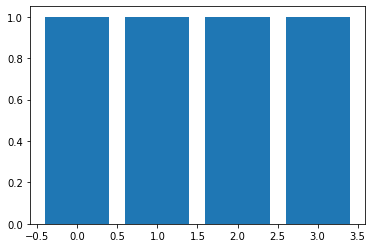

In [2413]:
fig, ax = plt.subplots()
ax.bar(train['Fare']*train['Sex'], train['Survived'])

In [2414]:
# Dropping the columns which can not help in classification or are too random like "Tickets" column
test.Name.unique()

array([ 5, 10, 11,  9, 16,  8,  2,  7,  0])

In [2415]:
train.drop(['Parch','Ticket','Cabin','AgeBand','FareBand'],axis = 1, inplace=True)
test.drop(['Parch','Ticket','Cabin'],axis = 1, inplace=True)

In [2416]:
train.sample(frac = 1)
y_full = train.Survived
train_data = train[:600]
test_data = train[600:]

In [2417]:
# Taking "Survival" column from train dataset and dropping it from train

In [2418]:
y = train_data.Survived
y_test = test_data.Survived
train = train.drop(["Survived"], axis = 1)
train_data = train_data.drop(["Survived"], axis = 1)
test_data = test_data.drop(["Survived"], axis = 1)

In [2419]:
# Data Cleaning and transformation is Done.
# Proceeding to next step of Model fitting and Prediction

In [2420]:
# First using Logistic Regression from scikit-learn

In [2421]:
from sklearn.linear_model import LogisticRegression

In [2422]:
# Fitting Logistic Regression Model
# Using C = 10, we can reach a maximum score of 80.8 %

In [2423]:
model = LogisticRegression(C = 10).fit(train_data,y)

In [2424]:
# Checking the fit on the train data itself by using score method

In [2425]:
Logisit_score = model.score(test_data,y_test)
Logisit_score

0.8281786941580757

In [2426]:
# Now using XGBoost, most recent development in classifier algorithms
# Fitting the model and then assessing the fit on train dataset itself using "score()" method

In [2427]:
from sklearn import  metrics, model_selection
from xgboost.sklearn import XGBClassifier

In [2428]:
test_y = pd.read_csv("gender_submission.csv", index_col= 0)

In [2429]:
model2 = XGBClassifier().fit(train_data,y)

In [2430]:
XGB_score = model2.score(test_data,y_test)
# model2.score(test_data,y_test)

In [2431]:
# Using Decision Tree Classifier

In [2432]:
from sklearn.tree import DecisionTreeClassifier

In [2433]:
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(train_data,y)
tree_score = tree.score(test_data,y_test)

In [2434]:
# displaying the decision tree created by the algorithms

In [2435]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file = "tree.dot",impurity =False, filled = True)
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
# display(graphviz.Source(dot_graph))

In [2436]:
# Using Random Forest Classifier
# using n_estimators = 100 as score decreases on n_estimator = 10 and at 100 it is at its maximum

In [2437]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=8,random_state=3,max_depth=4,min_impurity_split = 0.01).fit(train_data,y)
forest_score = forest.score(test_data,y_test)
forest.score(test_data,y_test)

0.8316151202749141

In [2438]:
# Using Gradient Boosted Trees
# learning rate is how much the new trees learns from the previous tree (as much as I understood)
# max_depth explains itself

In [2439]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state = 2, max_depth=3, learning_rate= 0.01,).fit(train_data,y)
GBC_score = GBC.score(test_data, y_test)
GBC.score(test_data,y_test)

0.8419243986254296

In [2440]:
# Using Support Vector Classifier
# Using Gaussian Kernel "rbf" and tuning the parameters gamma and C so that model doesn't overfit

In [2441]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
Lsvc = LinearSVC().fit(train_data, y)
svc = SVC(kernel = "rbf", C = 1, gamma = 0.09).fit(train_data, y)
svc_score = svc.score(test_data, y_test)
svc_score

0.8384879725085911

In [2442]:
# Using Neural Networks
# nonlinear tanh and using two hidden layers

In [2443]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter = 1000, solver = "lbfgs",activation="tanh", random_state=0, hidden_layer_sizes=[30,10], alpha = 0.6).fit(train, y_full)
mlp_score = mlp.score(test_data, y_test)
# mlp.score(test_data,y_test)

In [2444]:
Models = pd.DataFrame({'Model':['Logistic Regression', 'XGBoost','Decision Tree', 'Random Forest Classifier', 'Gradient Boosting', 'Support Vector Classifier', 'Neural Network'], 'Score':[Logisit_score, XGB_score,tree_score, forest_score,GBC_score, svc_score,mlp_score]})

In [2445]:
Models

,Model,Score
0,Logistic Regression,0.828179
1,XGBoost,0.810997
2,Decision Tree,0.793814
3,Random Forest Classifier,0.831615
4,Gradient Boosting,0.841924
5,Support Vector Classifier,0.838488
6,Neural Network,0.903780


In [2446]:
test['Fare'] = test['Fare'].fillna(test.Fare.mean())

In [2447]:
test

,Pclass,Name,Sex,Age,SibSp,Fare,C,Q,S
PassengerId,,,,,,,,,
892,3,5,0,2.0,1,0.0,0,1,0
893,3,10,1,3.0,2,0.0,0,0,1
894,2,5,0,3.0,1,1.0,0,1,0
895,3,5,0,1.0,1,1.0,0,0,1
896,3,10,1,0.0,3,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...
1305,3,5,0,2.0,1,1.0,0,0,1
1306,1,0,1,3.0,1,3.0,1,0,0
1307,3,5,0,3.0,1,0.0,0,0,1


In [2448]:
forest.score(test_data,y_test)

0.8316151202749141

In [2449]:
Y_pred = mlp.predict(test)

In [2450]:
test_df = pd.read_csv('test.csv')

In [2451]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submission2.csv', index=False)

In [2452]:
GBC.score(test_data,y_test)

0.8419243986254296

In [2453]:
# 0	Logistic Regression	0.835052
# 1	XGBoost	0.800687
# 2	Decision Tree	0.745704
# 3	Random Forest Classifier	0.810997
# 4	Gradient Boosting	0.848797
# 5	Support Vector Classifier	0.646048
# 6	Neural Network	0.804124

In [2454]:
# 0	Logistic Regression	0.838488
# 1	XGBoost	0.807560
# 2	Decision Tree	0.769759
# 3	Random Forest Classifier	0.804124
# 4	Gradient Boosting	0.852234
# 5	Support Vector Classifier	0.697595
# 6	Neural Network	0.886598

In [2455]:
train

,Pclass,Name,Sex,Age,SibSp,Fare,C,Q,S
PassengerId,,,,,,,,,
1,3,5,0,0.0,2,0.0,0,0,1
2,1,10,1,3.0,2,3.0,1,0,0
3,3,11,1,1.0,1,1.0,0,0,1
4,1,10,1,2.0,2,3.0,0,0,1
5,3,5,0,2.0,1,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...
887,2,2,0,1.0,1,1.0,0,0,1
888,1,11,1,0.0,1,2.0,0,0,1
889,3,11,1,2.0,4,2.0,0,0,1
